# Banking Marketing Campaign: Predicting Term Deposit Subscription.

# Introduction: 

In this notebook, we aim to analyze a marketing campaign dataset from a bank to predict whether a customer will subscribe to a term deposit or not. A term deposit is a financial product where customers deposit a fixed amount of money for a specified period and receive a higher interest rate than a regular savings account.

Banks often conduct marketing campaigns to promote their financial products, and understanding the characteristics of customers likely to subscribe to a term deposit can significantly optimize these campaigns. By analyzing past campaign data, we can develop a model to predict future customer behavior, allowing the bank to target its efforts more effectively.

# Problem Statement:
The goal of this project is to build a deep learning model that predicts whether a customer will subscribe to a term deposit based on various demographic and campaign-related features. The target variable is the deposit column, which indicates whether the customer subscribed (yes) or not (no). We aim to maximize the accuracy of the prediction and provide insights into the most important factors driving customer decisions.

# Approach:
To solve this problem, I will follow these steps:

1. Data Exploration and Visualization: I'll begin by loading the dataset, conducting exploratory analysis to understand the distribution of variables, and visualizing key patterns and relationships.

2. Data Preprocessing: The dataset contains both categorical and numerical variables. We'll clean the data, encode categorical variables, and scale numerical variables to prepare the data for modeling.

3. Modeling: Using a deep learning neural network, I'll build and train a model that predicts whether a customer will subscribe to a term deposit. We will evaluate its performance based on accuracy and other relevant metrics.

4. Evaluation: Finally, I will assess the model's performance on unseen test data and visualize the results to ensure the model generalizes well to new data.

By following this structured approach, I aim to deliver a predictive model that can support the bank in making data-driven marketing decisions, optimizing campaign efforts, and increasing customer subscription rates for term deposits.

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
# loading the dataset
df = pd.read_csv('bank.csv')

# Inspecting the data

In [3]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [4]:
df.shape

(11162, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# ydata_profile report for deeper insights:

In [8]:
# profile report to generate detailed analysis of our df
profile = ProfileReport(df, title="Bank Marketing Campaign Dataset report", explorative=True)

In [9]:
# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualising Key features to understand their distribution.

/var/folders/js/8bnyws5d18x0g67dk4jcfp8w0000gn/T/ipykernel_6626/2589281322.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='deposit', palette=palette)
/var/folders/js/8bnyws5d18x0g67dk4jcfp8w0000gn/T/ipykernel_6626/2589281322.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data=df, x='deposit', palette=palette)


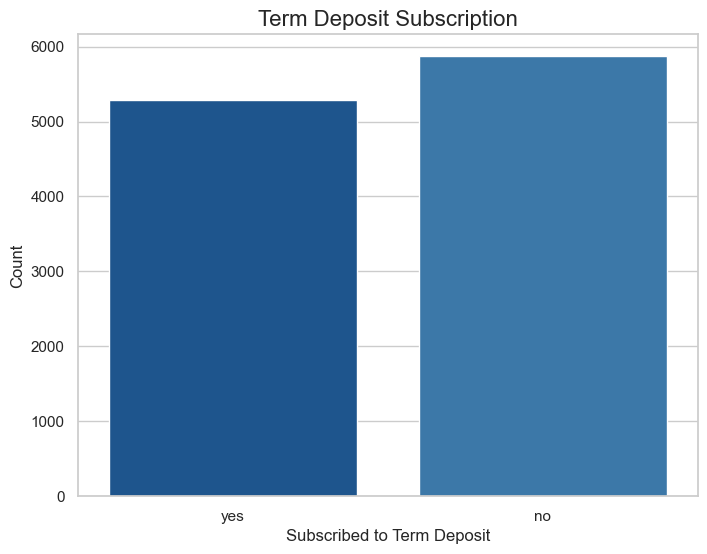

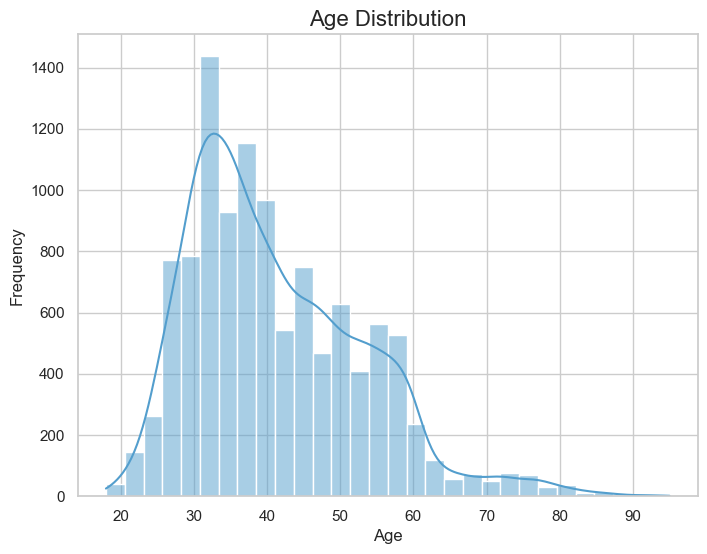

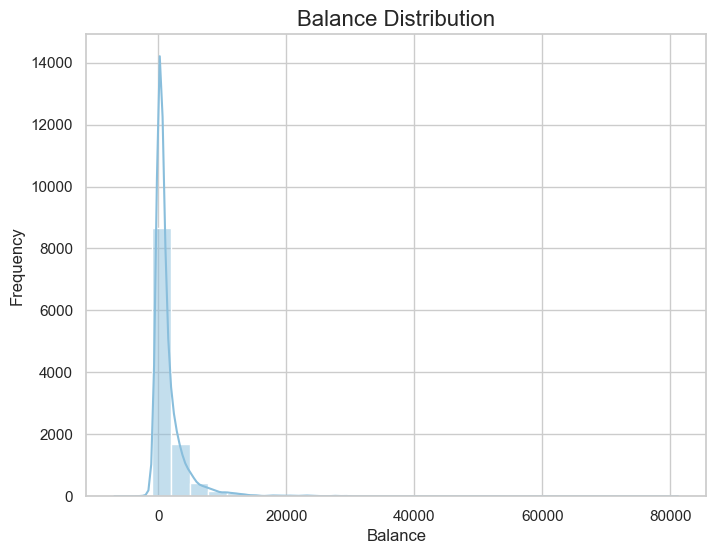

/var/folders/js/8bnyws5d18x0g67dk4jcfp8w0000gn/T/ipykernel_6626/2589281322.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='job', order=df['job'].value_counts().index, palette=palette)
/var/folders/js/8bnyws5d18x0g67dk4jcfp8w0000gn/T/ipykernel_6626/2589281322.py:31: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, y='job', order=df['job'].value_counts().index, palette=palette)


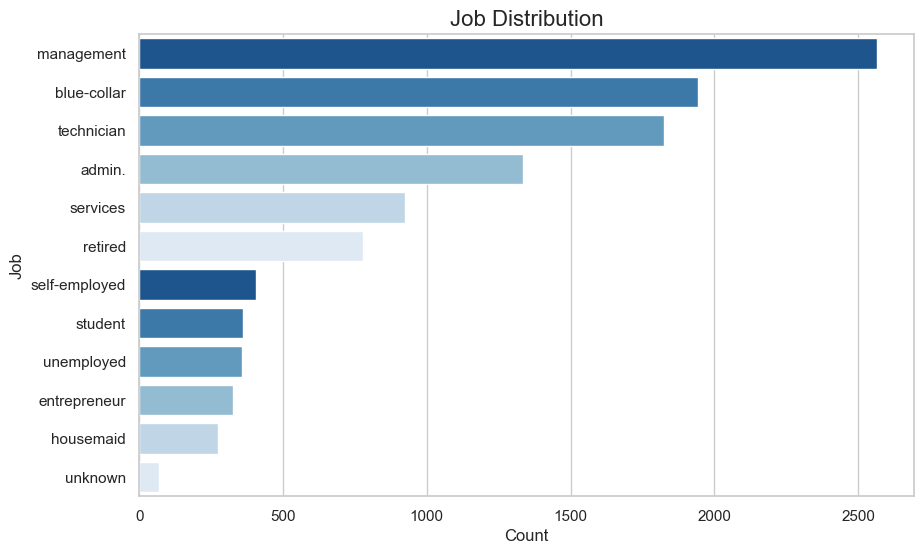

In [10]:
# style and color palette settings
sns.set(style='whitegrid')  # Setting the background style
palette = sns.color_palette("Blues_r")  # Choosing the color palette.

# Count plot for the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='deposit', palette=palette)
plt.title('Term Deposit Subscription', fontsize=16)
plt.xlabel('Subscribed to Term Deposit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True, color=palette[2])
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Distribution of balance
plt.figure(figsize=(8, 6))
sns.histplot(df['balance'], bins=30, kde=True, color=palette[3])
plt.title('Balance Distribution', fontsize=16)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Bar plot for 'job' categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='job', order=df['job'].value_counts().index, palette=palette)
plt.title('Job Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job', fontsize=12)
plt.show()


In [11]:
# data cleaning:
#There is no missing values or duplicates.

In [12]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [13]:
# Convert categorical variables into their numerical form using one-hot encoding.

In [14]:
# Convert categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

# Encode the target variable 'deposit' (Yes -> 1, No -> 0)
df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

# coonfirm dataset ransformed
df.head()

age  balance  day  duration  campaign  pdays  previous  deposit  \
0   59     2343    5      1042         1     -1         0        1   
1   56       45    5      1467         1     -1         0        1   
2   41     1270    5      1389         1     -1         0        1   
3   55     2476    5       579         1     -1         0        1   
4   54      184    5       673         2     -1         0        1   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False      False   
2            False             False  ...      False      False      False   
3            False             False  ...      False      False      False   
4            False             False  ...      False      False      False   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0       True      False      False      False           False   
1       True      False      False      False           False   
2       True      False      False      False           False   
3       True      False      False      False           False   
4       True      False      False      False           False   

   poutcome_success  poutcome_unknown  
0             False              True  
1             False              True  
2             False              True  
3             False              True  
4             False              True  

[5 rows x 43 columns]

# Model Selection and Building using tensorflow/keras

In [16]:
# key libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# data splitting
# Split the data into features (X) and target (y)
X = df.drop('deposit', axis=1)
y = df['deposit']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Building the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

/Users/kingoriwangui/jimmygmc_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.6756 - loss: 0.6111 - val_accuracy: 0.8240 - val_loss: 0.3970
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8324 - loss: 0.3836 - val_accuracy: 0.8262 - val_loss: 0.3843
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8514 - loss: 0.3463 - val_accuracy: 0.8271 - val_loss: 0.3844
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8608 - loss: 0.3299 - val_accuracy: 0.8298 - val_loss: 0.3754
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.8680 - loss: 0.3168 - val_accuracy: 0.8330 - val_loss: 0.3750
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.8658 - loss: 0.3194 - val_accuracy: 0.8294 - val_loss: 0.3765
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8759 - loss: 0.3012 - val_accuracy: 0.8365 - val_loss: 0.3740
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8783 - loss: 0.2917 - 

# Evaluating the model on test data

In [23]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8202 - loss: 0.4597
Test Accuracy: 0.8307


# visualising the model's accuracy and loss over epochs:

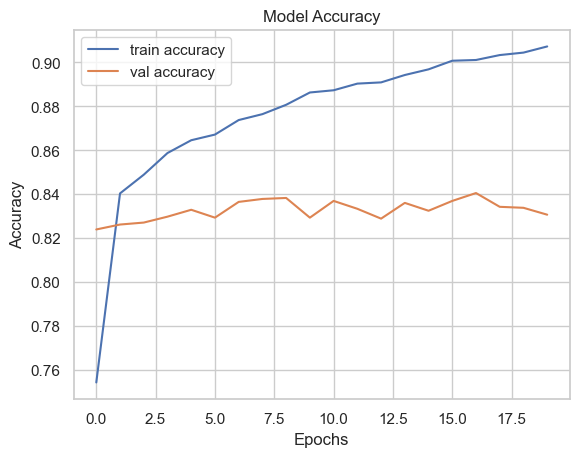

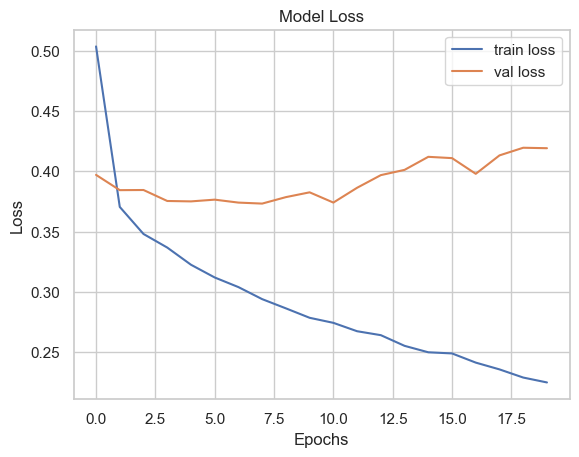

In [24]:
# Plot of accuracy over epochs.
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot of loss over epochs
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Conclusion:

The deep learning model achieved the following results during training and evaluation:

Training Accuracy: 82.02%
Test Accuracy: 83.07%
Loss: 0.4597

The model performed well, with a high accuracy indicating that it correctly predicted whether customers would subscribe to a term deposit for over 83% of the test data. The loss value of 0.4597 shows that the model has minimized the error in its predictions over time.

# Key Observations:

1. Accuracy Improvement Across Epochs: As the model trained over multiple epochs, the accuracy consistently improved, which shows that the model was effectively learning from the data.
2. Loss Reduction: The loss value decreased as the model progressed through training, indicating that the model was adjusting its parameters to reduce errors in predictions.

In conclusion, this deep learning model provides a robust tool for predicting customer subscription to term deposits, which can help optimize marketing strategies by focusing on customers most likely to respond positively to future campaigns.

